In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()



Saving DATASET.csv to DATASET (1).csv


In [ ]:
import io
high = pd.read_csv(io.BytesIO(uploaded['DATASET.csv']))
high.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [ ]:
high.tail()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


In [ ]:
high.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


From this, we can observe that the maximum earnings is 300 million and the minimum is 8 million. The average earning is 45 million and 50% of the sports players are below 39 million dollars in earnings.

In [ ]:
high.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [ ]:
high.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [ ]:
high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [ ]:
high.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
high.iloc[:,:] = imputer.fit_transform(high)
high.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,>10,boxing,1990,28.6
1,2,Buster Douglas,USA,2,>10,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,>10,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,>10,auto racing,1990,10.0
4,5,Alain Prost,France,5,>10,auto racing,1990,9.0


In [ ]:
high.isnull().sum()

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [ ]:
high.corr()

,S.NO,Current Rank,Year,earnings ($ million)
S.NO,1.000000,0.034739,0.999090,0.641399
Current Rank,0.034739,1.000000,0.001600,-0.449052
Year,0.999090,0.001600,1.000000,0.653866
earnings ($ million),0.641399,-0.449052,0.653866,1.000000


In [ ]:
high.cov()

,S.NO,Current Rank,Year,earnings ($ million)
S.NO,7575.166667,8.620000,788.133333,1871.533667
Current Rank,8.620000,8.128173,0.041351,-42.920659
Year,788.133333,0.041351,82.148173,198.682992
earnings ($ million),1871.533667,-42.920659,198.682992,1123.948234


In [ ]:
high["Nationality"].value_counts()

USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Argentina             9
Brazil                9
Canada                6
Italy                 4
Finland               3
Philippines           3
France                3
Australia             1
Dominican             1
Ireland               1
Russia                1
Spain                 1
Filipino              1
Serbia                1
Austria               1
Northern Ireland      1
Mexico                1
Name: Nationality, dtype: int64

In [ ]:
high[high["Nationality"] == "USA"]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,>10,boxing,1990,28.6
1,2,Buster Douglas,USA,2,>10,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,>10,boxing,1990,13.0
5,6,Jack Nicklaus,USA,6,>10,golf,1990,8.6
7,8,Michael Jordan,USA,8,>10,basketball,1990,8.1
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [ ]:
high["Nationality"].value_counts()[0:10]

USA            206
UK              13
Germany         13
Switzerland     12
Portugal        10
Argentina        9
Brazil           9
Canada           6
Italy            4
Finland          3
Name: Nationality, dtype: int64

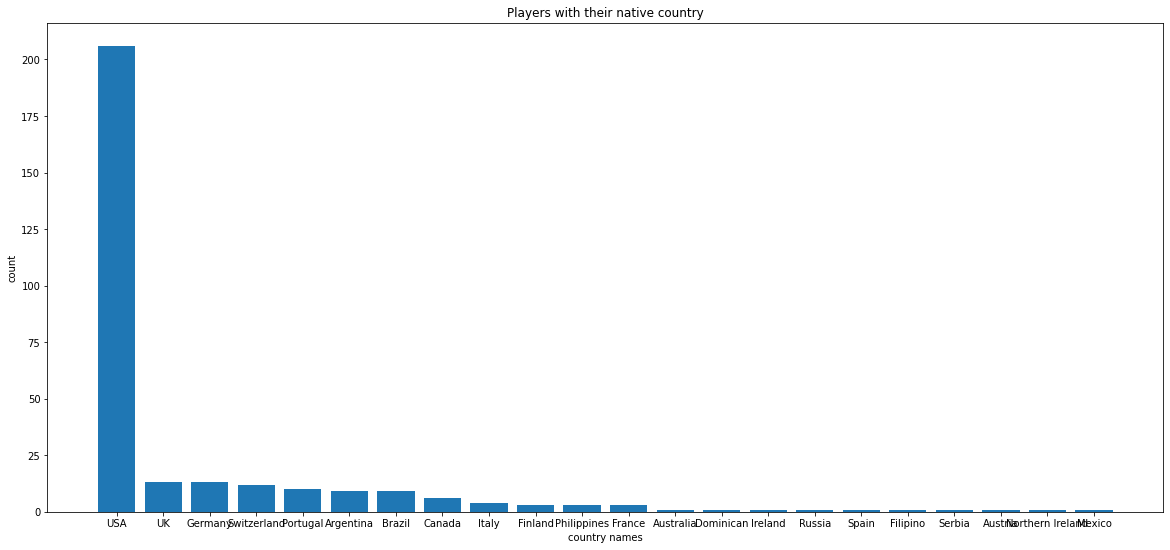

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(list(high["Nationality"].value_counts().keys()),list(high["Nationality"].value_counts()))
plt.title("Players with their native country")
plt.ylabel("count")
plt.xlabel("country names")
plt.show()

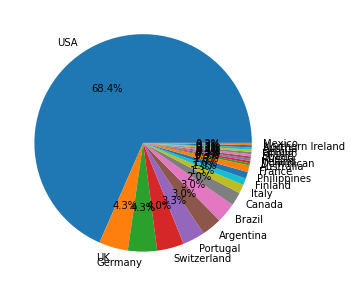

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(list(high["Nationality"].value_counts()),labels=list(high["Nationality"].value_counts().keys()),autopct="%0.1f%%")
plt.show()

In [ ]:
high["Year"].value_counts()

2002    11
2020    10
2019    10
1991    10
1992    10
1993    10
1994    10
1995    10
1996    10
1997    10
1998    10
1999    10
2000    10
2003    10
2004    10
2005    10
2006    10
2007    10
2008    10
2009    10
2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
2016    10
2017    10
2018    10
1990    10
Name: Year, dtype: int64

In [ ]:
rank=((high["Current Rank"]==high["Previous Year Rank"]))
rank.value_counts()

False    301
dtype: int64

In [ ]:
rank_1=high[high["Current Rank"]==1]
rank_1

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,>10,boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
20,21,Michael Jordan,USA,1,3,Basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,Basketball,1993,36.0
40,41,Michael Jordan,USA,1,1,Basketball,1994,30.0
50,51,Michael Jordan,USA,1,1,basketball,1995,43.9
60,61,Mike Tyson,USA,1,2,Boxing,1996,75.0
70,71,Michael Jordan,USA,1,2,Basketball,1997,78.3
80,81,Michael Jordan,USA,1,>10,Basketball,1998,69.0
90,91,Michael Schumacher,Germany,1,2,Auto Racing,1999,49.0


In [ ]:
rank_1["Name"].value_counts()

Tiger Woods           11
Michael Jordan         6
Floyd Mayweather       4
Cristiano Ronaldo      2
Mike Tyson             2
Michael Schumacher     2
Evander Holyfield      1
Roger Federer          1
Lionel Messi           1
Name: Name, dtype: int64

In [ ]:
rank_1["Sport"].value_counts()

golf           8
Basketball     5
Boxing         5
Golf           3
Soccer         3
Auto Racing    2
boxing         2
basketball     1
Tennis         1
Name: Sport, dtype: int64

In [ ]:
rank_1[rank_1["Name"]=="Tiger Woods"]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
110,111,Tiger Woods,USA,1,2,Golf,2002,69.0
121,122,Tiger Woods,USA,1,1,Golf,2003,78.0
131,132,Tiger Woods,USA,1,1,golf,2004,80.3
141,142,Tiger Woods,USA,1,1,golf,2005,87.0
151,152,Tiger Woods,USA,1,1,golf,2006,90.0
161,162,Tiger Woods,USA,1,1,golf,2007,100.0
171,172,Tiger Woods,USA,1,1,golf,2008,115.0
181,182,Tiger Woods,USA,1,1,golf,2009,110.0
191,192,Tiger Woods,USA,1,1,golf,2010,105.0
201,202,Tiger Woods,USA,1,1,golf,2011,75.0


<BarContainer object of 9 artists>

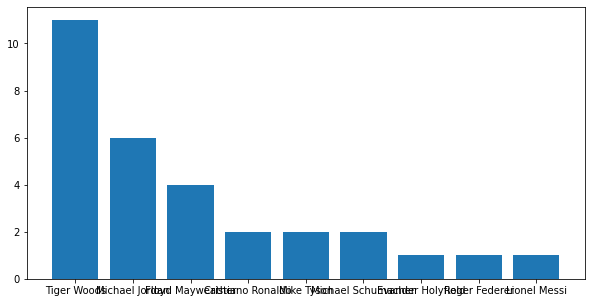

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(list(rank_1["Name"].value_counts().keys()),list(rank_1["Name"].value_counts()),align="center")

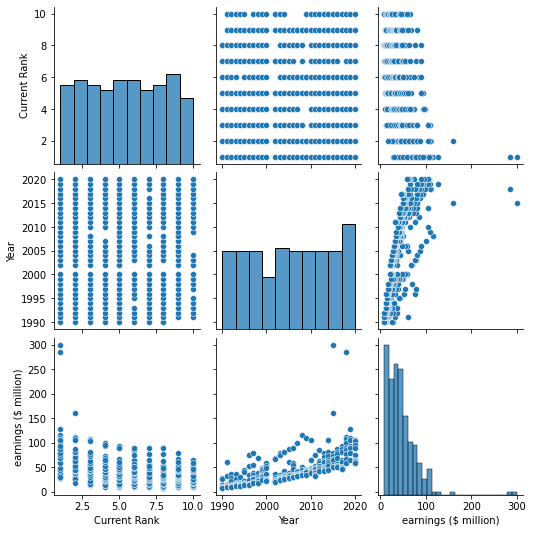

In [ ]:
import seaborn as sns
high_df=high.iloc[:,3:8]
sns.pairplot(high_df)

In [ ]:
high["earnings ($ million)"].unique()

array([ 28.6,  26. ,  13. ,  10. ,   9. ,   8.6,   8.5,   8.1,  60.5,
        31.5,  16. ,  14.5,  11. ,  10.2,   9.3,  35.9,  28. ,  22. ,
        11.1,   9.5,   9.2,  36. ,  25. ,  18.5,  15.8,  15.2,  15. ,
        12.7,  12.6,  11.5,  30. ,  16.7,  14.8,  13.6,  13.5,  12.1,
        12. ,  11.4,  11.3,  43.9,  40. ,  22.5,  22.2,  21.9,  18. ,
        15.1,  75. ,  52.6,  33. ,  24.4,  16.5,  15.5,  12.9,  78.3,
        54.3,  38. ,  35. ,  27. ,  26.1,  25.4,  19.1,  17.9,  17. ,
        69. ,  29.8,  26.8,  24.1,  21.6,  18.3,  18.1,  17.2,  49. ,
        47. ,  43.5,  35.5,  31. ,  29. ,  26.5,  23. ,  59. ,  53. ,
        48. ,  37. ,  24.5,  24. ,  21. ,  67. ,  20. ,  78. ,  30.5,
        25.5,  80.3,  80. ,  42. ,  31.9,  29.7,  28.2,  26.2,  87. ,
        60. ,  37.5,  33.4,  32.5,  28.8,  90. ,  58. ,  55. ,  32. ,
       100. ,  43. , 115. ,  50. ,  45. ,  44. ,  39. , 110. ,  34. ,
       105. ,  65. ,  46. ,  43.7,  42.8,  39.9,  38.3,  46.5,  32.3,
        85. ,  62. ,

In [ ]:
highest_earnings=high.sort_values(by = "earnings ($ million)",ascending=False)
highest_earnings.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0
242,243,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0
281,282,Lionel Messi,Argentina,1,2,Soccer,2019,127.0
171,172,Tiger Woods,USA,1,1,golf,2008,115.0


In [ ]:
high[high['earnings ($ million)'] >= 300]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


Thus, the highest paid athlete is Floyd Mayweather from USA with an earning of 300 million $.

In [ ]:
highest_earnings.tail()


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
19,20,Sugar Ray Leonard,USA,10,6,golf,1991,8.5
29,30,Monica Seles,USA,10,12,Tennis,1992,8.5
9,10,Evander Holyfield,USA,8,>10,boxing,1990,8.1
8,9,Arnold Palmer,USA,8,>10,golf,1990,8.1
7,8,Michael Jordan,USA,8,>10,basketball,1990,8.1


In [ ]:
high[high['earnings ($ million)'] <= 9]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
4,5,Alain Prost,France,5,>10,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,>10,golf,1990,8.6
6,7,Greg Norman,Australia,7,>10,golf,1990,8.5
7,8,Michael Jordan,USA,8,>10,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,>10,golf,1990,8.1
9,10,Evander Holyfield,USA,8,>10,boxing,1990,8.1
18,19,Nigel Mansell,UK,9,12,auto racing,1991,9.0
19,20,Sugar Ray Leonard,USA,10,6,golf,1991,8.5
28,29,Jim Courier,USA,9,>40,Tennis,1992,9.0
29,30,Monica Seles,USA,10,12,Tennis,1992,8.5


These are the lowest earning athletes

In [ ]:
high_year = high.groupby('Year').sum()
high_year.sort_values('earnings ($ million)',ascending=False).head(7)

,S.NO,Current Rank,earnings ($ million)
Year,,,
2018,2765,55,1059.4
2015,2465,55,950.3
2019,2865,55,941.4
2020,2965,55,819.2
2014,2365,55,642.4
2016,2565,55,635.2
2017,2665,54,623.7


This shows the years with the highest earning

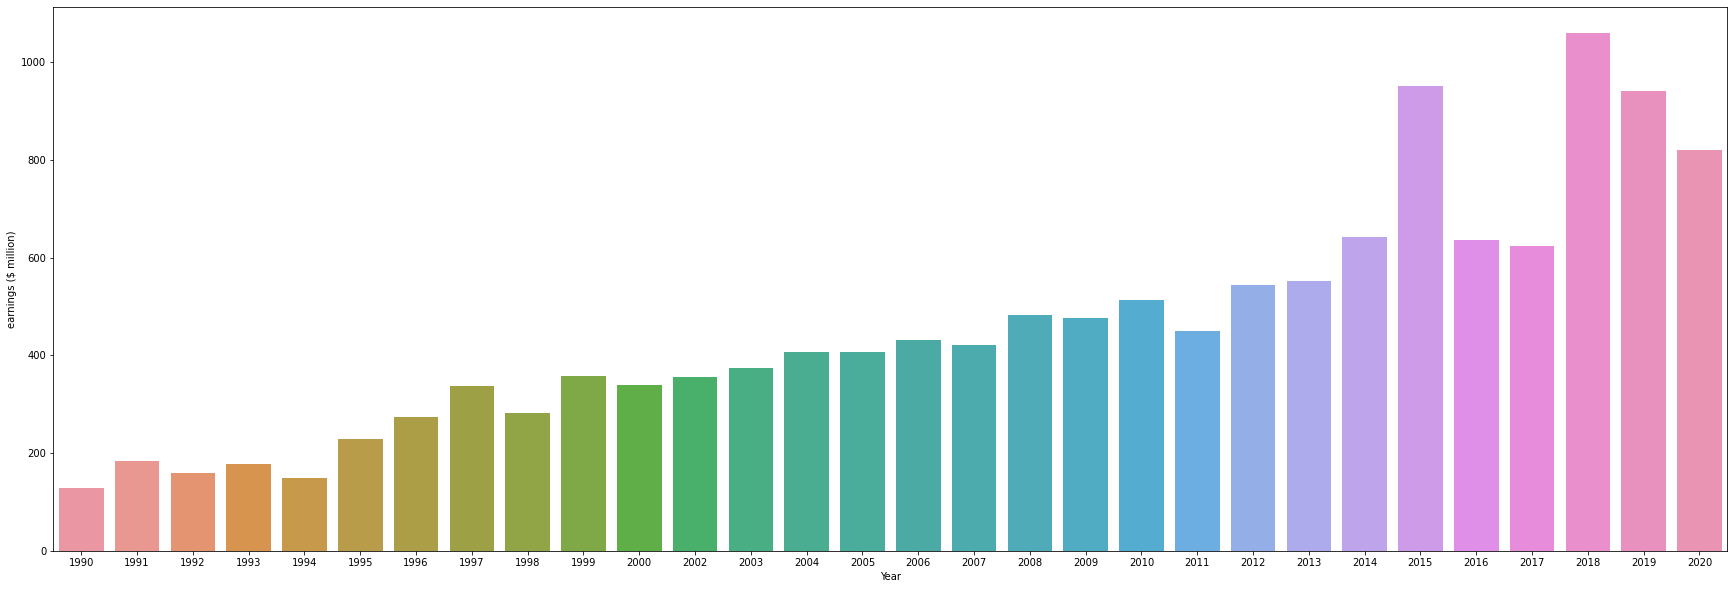

In [ ]:
high_year['Change'] = high_year.pct_change()['earnings ($ million)']*100
plt.figure(figsize=(30,10))
sns.barplot(x=high_year.index, y='earnings ($ million)', data=high_year)

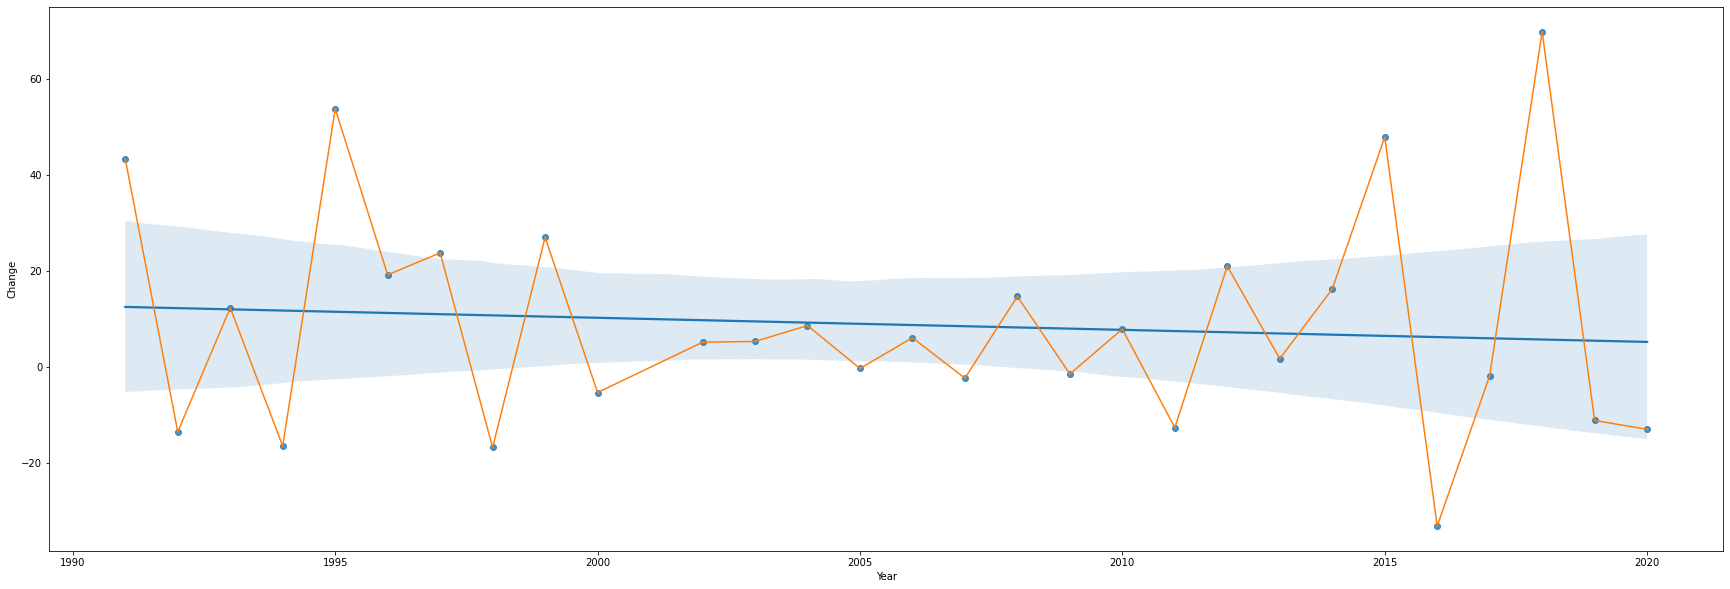

In [ ]:
plt.figure(figsize=(30,10))
sns.regplot(x=high_year.index, y='Change', data=high_year)
sns.lineplot(x=high_year.index, y='Change', data=high_year)

Hence, we can observe that there is a sudden rise in earning in the years of 1995 and onwards. A similar sharp increase is seen in 2015. This may be attributed to the occurence of the Olympic Games in the years of 2014 and 1994.

In [ ]:
high_n = high.groupby('Name').count()[['Year','S.NO']]
high_n['earning'] = high.groupby('Name').sum()['earnings ($ million)']
high_n['average'] = high_n.earning / high_n.Year
high_n = high_n.drop('S.NO',axis=1)
high_n = high_n.rename(columns={'Year':'count'})
high_n

,count,earning,average
Name,,,
Aaron Rodgers,1,49.0,49.000000
Aaron Rogers,1,89.3,89.300000
Alain Prost,3,36.0,12.000000
Alex Rodriguez,4,116.2,29.050000
Andre Agassi,6,105.8,17.633333
...,...,...,...
Terrell Suggs,1,38.3,38.300000
Tiger Woods,19,1373.8,72.305263
Tom Brady,1,29.0,29.000000


In [ ]:
high_n.sort_values('count',ascending=False).head(8)

,count,earning,average
Name,,,
Michael Jordan,19,738.8,38.884211
Tiger Woods,19,1373.8,72.305263
Kobe Bryant,14,601.1,42.935714
LeBron James,13,844.8,64.984615
Michael Schumacher,13,639.0,49.153846
Roger Federer,12,781.1,65.091667
Phil Mickelson,11,519.9,47.263636
Cristiano Ronaldo,10,787.1,78.710000


In [ ]:
high_n.sort_values('average',ascending=False).head(8)

,count,earning,average
Name,,,
Floyd Mayweather,5,840.0,168.000000
Conor McGregor,1,99.0,99.000000
Neymar,3,290.5,96.833333
Canelo Alvarez,1,94.0,94.000000
Russell Wilson,1,89.5,89.500000
Aaron Rogers,1,89.3,89.300000
Lionel Messi,9,715.5,79.500000
Cristiano Ronaldo,10,787.1,78.710000


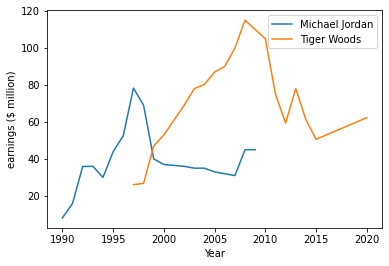

In [ ]:
sns.lineplot(y=high[high.Name == 'Michael Jordan']['earnings ($ million)'], x=high[high.Name == 'Michael Jordan']['Year'], label='Michael Jordan')
sns.lineplot(y=high[high.Name == 'Tiger Woods']['earnings ($ million)'], x=high[high.Name == 'Tiger Woods']['Year'], label='Tiger Woods')

In order to find out the athletes belonging to which sport have the highest earning or are the richest, we can group the data accordingly

In [ ]:
high.groupby('Sport').sum()

,S.NO,Current Rank,Year,earnings ($ million)
Sport,,,,
American Football,4018,130,34234,901.2
American Football / Baseball,53,3,1995,22.5
Auto Racing,718,57,19968,254.8
Auto Racing (Nascar),227,16,4002,44.5
Auto racing,33,3,1993,18.5
Baseball,256,25,5994,55.9
Basketball,8939,308,108353,2477.5
Boxing,3413,125,58048,1743.2
F1 Motorsports,454,13,9996,248.0


In [ ]:
s_name = {'baseball' : 'Baseball', 'F1 Motorsports' : 'F1 racing', 'soccer' : 'Soccer', 'golf' : 'Golf',
          'basketball' : 'Basketball', 'boxing' : 'Boxing', 'auto racing':'Auto Racing',
         'Auto Racing (Nascar)':'Auto Racing', 'Auto racing':'Auto Racing', 'ice hockey':'Ice Hockey',
         'American Football / Baseball':'American Football','NASCAR':'Auto Racing','NFL':'American Football'}
high['Sport'] = high.Sport.replace(s_name)

In [ ]:
high_s = high.groupby('Sport').count()[['Year','S.NO']]
high_s['earning'] = high.groupby('Sport').sum()['earnings ($ million)']
high_s['average'] = high_s.earning / high_s.Year
high_s = high_s.drop('S.NO',axis=1)
high_s = high_s.rename(columns={'Year':'count'})
high_s

,count,earning,average
Sport,,,
American Football,21,961.2,45.771429
Auto Racing,23,508.0,22.086957
Baseball,6,146.1,24.350000
Basketball,81,3418.1,42.198765
Boxing,46,2298.8,49.973913
F1 racing,13,645.0,49.615385
Golf,44,2136.5,48.556818
Hockey,1,17.9,17.900000
Ice Hockey,3,57.8,19.266667


In [ ]:
high_s.sort_values('earning',ascending=False).head(8)


,count,earning,average
Sport,,,
Basketball,81,3418.1,42.198765
Boxing,46,2298.8,49.973913
Soccer,33,2223.5,67.378788
Golf,44,2136.5,48.556818
American Football,21,961.2,45.771429
Tennis,18,848.1,47.116667
F1 racing,13,645.0,49.615385
Auto Racing,23,508.0,22.086957


The number of players of the sport "Basketball" are maximum in number in the list

In [ ]:
high_s.sort_values('average',ascending=False).head(8)

,count,earning,average
Sport,,,
MMA,1,99.0,99.000000
Soccer,33,2223.5,67.378788
Boxing,46,2298.8,49.973913
F1 racing,13,645.0,49.615385
Golf,44,2136.5,48.556818
Tennis,18,848.1,47.116667
American Football,21,961.2,45.771429
Basketball,81,3418.1,42.198765


Here, we get the highest average for MMA, even though it has only 1 data point. 



In second place, soccer is observed to have an average of 67.37 which implies that soccer players have higher earning as compared to basketball

In [ ]:
high.groupby('Nationality').sum().sort_values('earnings ($ million)', ascending=False)


,S.NO,Current Rank,Year,earnings ($ million)
Nationality,,,,
USA,28738,1145,412806,8786.3
Portugal,2499,39,20155,787.1
Switzerland,2882,59,24173,781.1
Argentina,2288,39,18143,715.5
Germany,1510,44,26023,639.0
UK,2028,88,26073,443.2
Brazil,1279,44,18038,422.0
Philippines,631,16,6034,242.0
Finland,526,11,6024,129.0


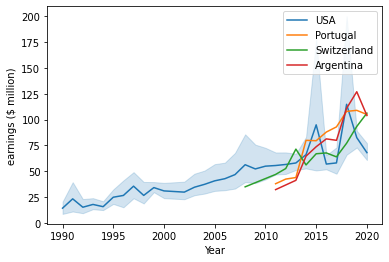

In [ ]:
sns.lineplot(y=high[high.Nationality == 'USA']['earnings ($ million)'], x=high[high.Nationality == 'USA']['Year'], label='USA')
sns.lineplot(y=high[high.Nationality == 'Portugal']['earnings ($ million)'], x=high[high.Nationality == 'Portugal']['Year'], label='Portugal')
sns.lineplot(y=high[high.Nationality == 'Switzerland']['earnings ($ million)'], x=high[high.Nationality == 'Switzerland']['Year'], label='Switzerland')
sns.lineplot(y=high[high.Nationality == 'Argentina']['earnings ($ million)'], x=high[high.Nationality == 'Argentina']['Year'], label='Argentina')


As clearly seen, in the case of USA they have started taking part ever since 1990 as compared to the countries in 2nd, 3rd and 4th places which started much later in the 2000s

In [ ]:
high_2007 = high[high.Year > 2007]

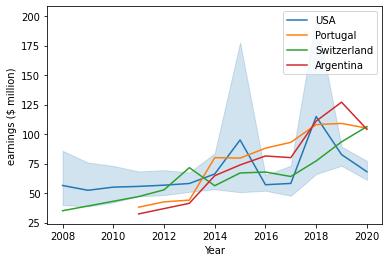

In [ ]:
sns.lineplot(y=high_2007[high_2007.Nationality == 'USA']['earnings ($ million)'], x=high_2007[high_2007.Nationality == 'USA']['Year'], label='USA')
sns.lineplot(y=high_2007[high_2007.Nationality == 'Portugal']['earnings ($ million)'], x=high_2007[high_2007.Nationality == 'Portugal']['Year'], label='Portugal')
sns.lineplot(y=high_2007[high_2007.Nationality == 'Switzerland']['earnings ($ million)'], x=high_2007[high_2007.Nationality == 'Switzerland']['Year'], label='Switzerland')
sns.lineplot(y=high_2007[high_2007.Nationality == 'Argentina']['earnings ($ million)'], x=high_2007[high_2007.Nationality == 'Argentina']['Year'], label='Argentina')


In [ ]:
high_boxing=high[high["Sport"]=="Boxing"]
high_boxing.sort_values(by="earnings ($ million)",ascending=False)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0
242,243,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0
231,232,Floyd Mayweather,USA,1,14,Boxing,2014,105.0
284,285,Canelo Alvarez,Mexico,4,15,Boxing,2019,94.0
211,212,Floyd Mayweather,USA,1,?,Boxing,2012,85.0
60,61,Mike Tyson,USA,1,2,Boxing,1996,75.0
192,193,Floyd Mayweather,USA,2,>10,Boxing,2010,65.0
212,213,Manny Pacquiao,Filipino,2,24,Boxing,2012,62.0
10,11,Evander Holyfield,USA,1,8,Boxing,1991,60.5


In [ ]:
high_golf=high[high["Sport"]=="golf"]
high_golf.sort_values(by="earnings ($ million)",ascending=False)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)


In [ ]:
high_basketball=high[high["Sport"]=="Basketball"]
high_basketball.sort_values(by="earnings ($ million)",ascending=False)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
288,289,LeBron James,USA,8,6,Basketball,2019,89.0
295,296,LeBron James,USA,5,8,Basketball,2020,88.2
262,263,LeBron James,USA,2,3,Basketball,2017,86.2
276,277,LeBron James,USA,6,2,Basketball,2018,85.5
289,290,Stephen Curry,USA,9,8,Basketball,2019,79.8
...,...,...,...,...,...,...,...,...
41,42,Shaq O'Neal,USA,2,6,Basketball,1994,16.7
12,13,Michael Jordan,USA,3,8,Basketball,1991,16.0
68,69,Dennis Rodman,USA,9,not ranked,Basketball,1996,12.9
69,70,Patrick Ewing,USA,9,19,Basketball,1996,12.9


In [ ]:
high_soccer=high[high["Sport"]=="Soccer"]
high_soccer.sort_values(by="earnings ($ million)",ascending=False)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
281,282,Lionel Messi,Argentina,1,2,Soccer,2019,127.0
272,273,Lionel Messi,Argentina,2,3,Soccer,2018,111.0
282,283,Cristiano Ronaldo,Portugal,2,3,Soccer,2019,109.0
273,274,Cristiano Ronaldo,Portugal,3,1,Soccer,2018,108.0
292,293,Cristiano Ronaldo,Portugal,2,2,Soccer,2020,105.0
283,284,Neymar,Brazil,3,5,Soccer,2019,105.0
293,294,Lionel Messi,Argentina,3,1,Soccer,2020,104.0
294,295,Neymar,Brazil,4,3,Soccer,2020,95.5
261,262,Cristiano Ronaldo,Portugal,1,1,Soccer,2017,93.0
275,276,Neymar,Brazil,5,18,Soccer,2018,90.0


In [ ]:
high_autoracing=high[high["Sport"]=="Auto Racing"]
high_autoracing.sort_values(by="earnings ($ million)",ascending=False)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
100,101,Michael Schumacher,Germany,1,1,Auto Racing,2000,59.0
90,91,Michael Schumacher,Germany,1,2,Auto Racing,1999,49.0
270,271,Lewis Hamilton,UK,10,>10,Auto Racing,2017,46.0
190,191,Dale Earnhardt Jr.,USA,10,>10,Auto Racing,2009,34.0
98,99,Dale Earnhardt,USA,9,5,Auto Racing,1999,26.5
105,106,Dale Earnhardt,USA,6,9,Auto Racing,2000,24.5
84,85,Dale Earnhardt,USA,5,>10,Auto Racing,1998,24.1
130,131,Jacques Villeneuve,Canada,10,10,Auto Racing,2003,23.0
22,23,Ayrton Senna,Brazil,3,5,Auto Racing,1992,22.0
120,121,Jeff Gordon,USA,10,>10,Auto Racing,2002,20.0
